# Problem 1.
Suppose that you have some images that need to be loaded from some server and be shown to
the user. Since the loading may take some time, we want to have proxy images in case the real
images are not loaded after some fixed amount of time. Simulate this scenario with classes of
your choice and using proxy design pattern principle.


In [1]:
import time
import threading
from abc import ABC

class Image(ABC):
    
    def display(self):
        pass
    
class RealImage(Image):

    def __init__(self, path):
        self.path = path

    def display(self):
        time.sleep(len(self.path))

class ProxyImage(Image):

    def __init__(self, path):
        self.real_image = RealImage(path)

    def display(self):
        display = threading.Thread(target=self.real_image.display, daemon=True)
        display.start()

        display.join(5) # 5 sec timeout
        
        if display.is_alive():
            print(f'Sorry it took too long to display the image "{self.real_image.path}"')
            return
        
        print(f'Image "{self.real_image.path}" is displayed!')
                
        
small_image = ProxyImage('/a/i')
small_image.display()

big_image = ProxyImage('/very/big/image')
big_image.display()

Image "/a/i" is displayed!
Sorry it took too long to display the image "/very/big/image"


# Problem 2.
Use flyweight design pattern and classes of your choice to implement the logic in the diagram
below. The tree factory should decide if it needs to create a new tree object or reuse an existing
one, based on the values of the attributes.


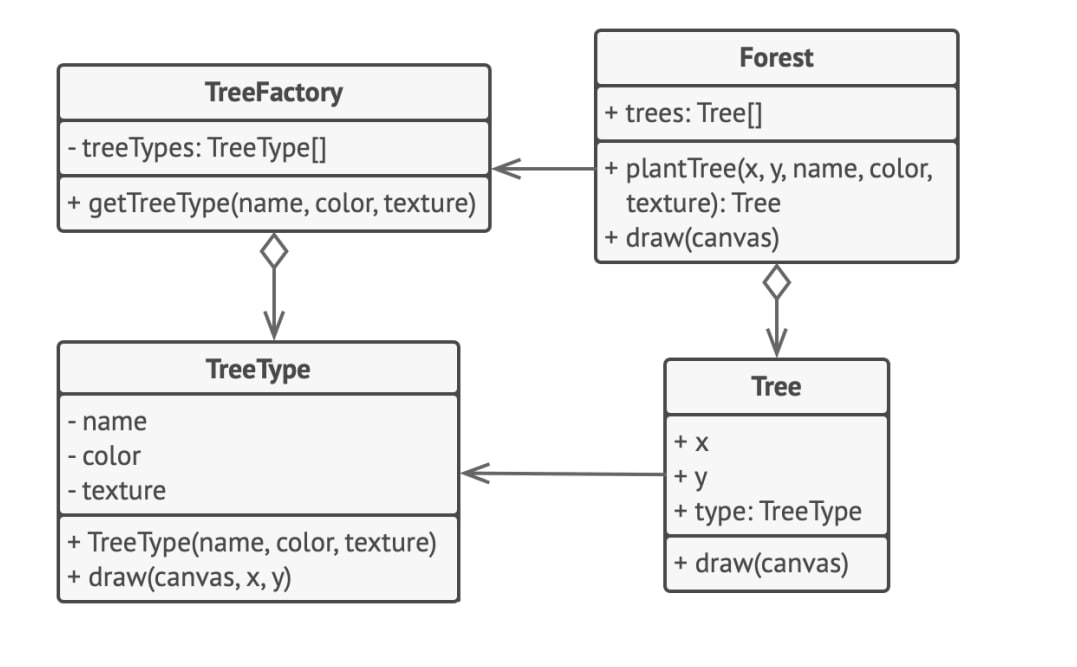

In [2]:
class TreeFactory:
    
    tree_types = {}
    
    @staticmethod
    def get_tree_type(name, color, texture):
        key = "_".join([name, color, texture])
        
        if not TreeFactory.tree_types.get(key):
            TreeFactory.tree_types[key] = TreeType(name, color, texture)

        return TreeFactory.tree_types[key]
    
class TreeType:
    
    def __init__(self, name, color, texture):
        self.name = name
        self.color = color
        self.texture = texture
    
    def draw(self, canvas, x, y):
        
        print(f'{self.name} {self.color} {self.texture} tree is drawn!')
        
class Tree:

    def __init__(self, x, y, tree_type):
        self.x = x
        self.y = y
        self.tree_type = tree_type
        
    def draw(self, canvas):
        self.tree_type.draw(canvas, self.x, self.y)
        

class Forest:

    def __init__(self):
        self.trees = []
        
    def plant_tree(self, x, y, name, color, texture):
        tree_type = TreeFactory.get_tree_type(name, color, texture)
        tree = Tree(x, y, tree_type)
        self.trees.append(tree)

    def draw(self, canvas):
        for t in self.trees:
            t.draw(canvas)
        
forest = Forest()
forest.plant_tree(x=1, y=3, name='palm', color='blue', texture='palm_texture')
forest.plant_tree(x=2, y=2, name='maple', color='red', texture='maple_texture')
forest.plant_tree(x=3, y=1, name='maple', color='red', texture='maple_texture')
print(forest.trees)
print(TreeFactory.tree_types)
forest.draw('canvas')

[<__main__.Tree object at 0x000001944D4BCE80>, <__main__.Tree object at 0x000001944D54D8B0>, <__main__.Tree object at 0x000001944D4BC550>]
{'palm_blue_palm_texture': <__main__.TreeType object at 0x000001944D499E50>, 'maple_red_maple_texture': <__main__.TreeType object at 0x000001944D4BCD00>}
palm blue palm_texture tree is drawn!
maple red maple_texture tree is drawn!
maple red maple_texture tree is drawn!


<IPython.core.display.Javascript object>


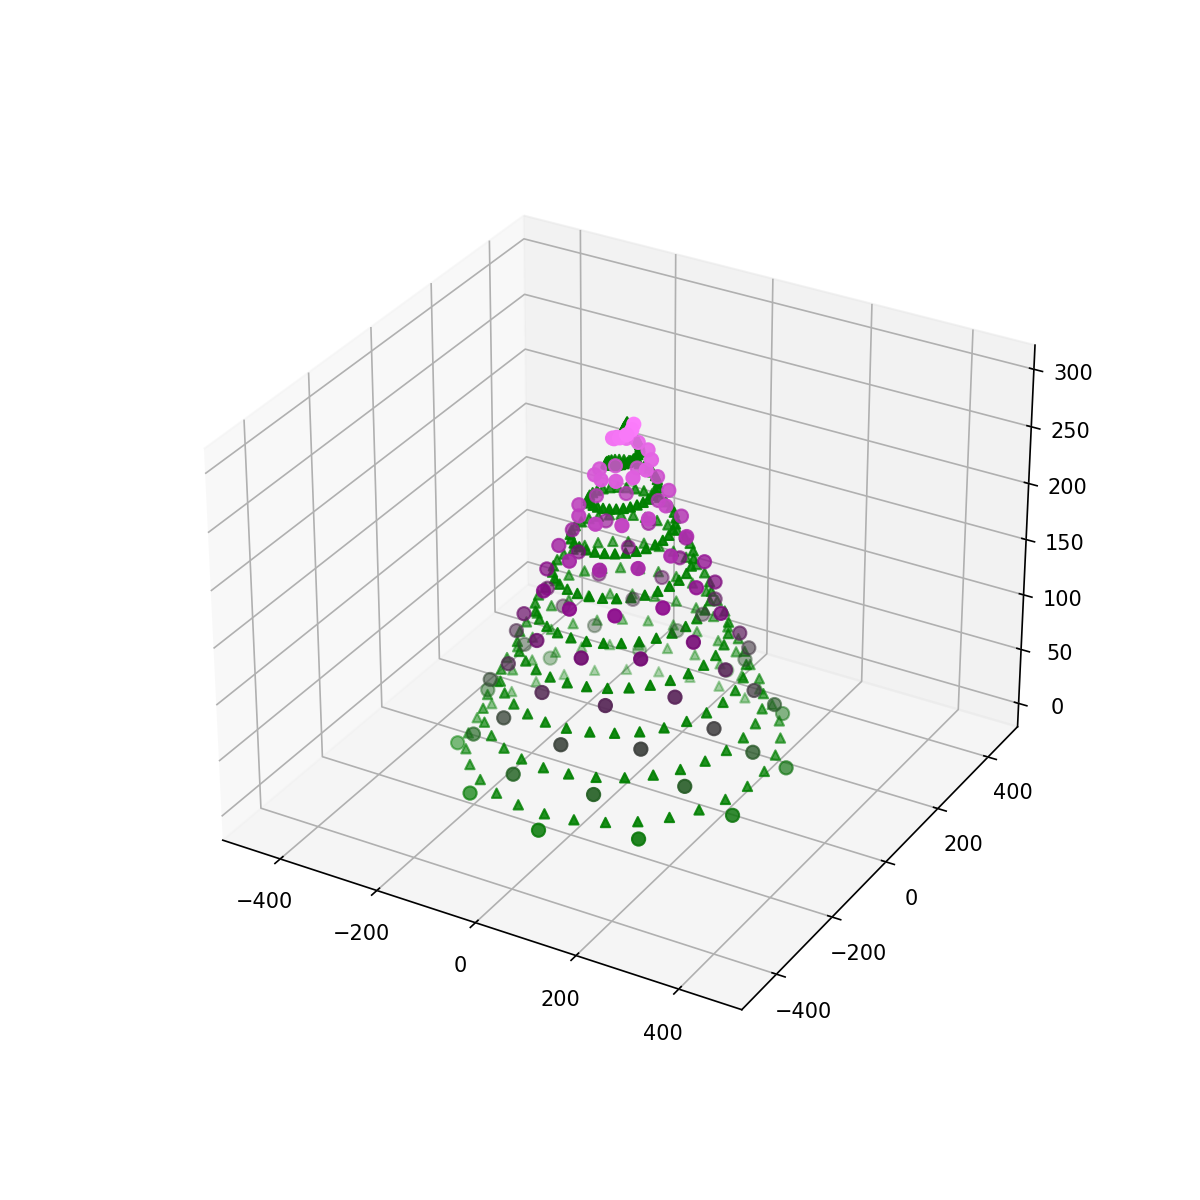

In [4]:
import math
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
def init():
    k=300
    Z = [i for i in range(k)]
    X = [math.cos(i/5)*(k-i) for i in range(k)]
    Y = [math.sin(i/5)*(k-i) for i in range(k)]
    ax.scatter(X,Y,Z, c="green", marker="^")
    step = 3
    c = [(i/k,abs(0.5-i/k),i/k) for i in range(1,k,step)]
    Z = [i for i in range(1,k,step)]
    X = [math.cos(i/5+2)*(k-i+10) for i in range(1,k,step)]
    Y = [math.sin(i/5+2)*(k-i+10) for i in range(1,k,step)]
    ax.scatter(X,Y,Z, c=c, marker="o",s=40)
    plt.xlim(-500,500)
    plt.ylim(-500,500)
    return fig,

def animate(f):
    fig.clear()
    ax = fig.add_subplot(111, projection="3d")
    k=300
    Z = [i for i in range(k)]
    X = [math.cos(i/5+f/10)*(k-i) for i in range(k)]
    Y = [math.sin(i/5+f/10)*(k-i) for i in range(k)]
    ax.scatter(X,Y,Z, c="green", marker="^")
    step = 3
    c = [(i/k,abs(0.5-i/k),i/k) for i in range(1,k,step)]
    Z = [i for i in range(1,k,step)]
    X = [math.cos(i/5+2+f/10)*(k-i+10) for i in range(1,k,step)]
    Y = [math.sin(i/5+2+f/10)*(k-i+10) for i in range(1,k,step)]
    ax.scatter(X,Y,Z, c=c, marker="o",s=40)
    plt.xlim(-500,500)
    plt.ylim(-500,500)
    return fig,
ani=animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=True)
# ani.save("christmas_tree.mp4")